# Lập trình KHDL <br>
# CHỌN ĐỀ TÀI : CREDIT CARD CUSTOMER

## DANH SÁCH CÂU HỎI
Câu 1 : (Data_exploration) đưa ra thông số chung để biết : Có sự khác biệt rõ ràng giữa nhóm người ở lại và người rời đi hay không <br> 

 Câu 2 : (preprocessing.ipynb và data_processing.py) : Sự tương quan pearson giữa sự stay và các thông số ( tuổi , marry, nghề , thu nhập ) <br>
 
 Câu 3 : (Model.py, model.ipynb) : Dự đoán khách hàng có ở lại hay không ?

In [1]:
import sys
sys.path.append("../src")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import processing
from processing import Collect_Data
from processing import Create_Exist_Group
from processing import Create_Attrited_Group
from processing import Seperate_Attribution
from processing import Print_Statistics
from processing import Calculate_Point_biserial_Correlation
from processing import Calculate_Chi_Squared

In [3]:
from visualization import Plot_Age_Histogram
from visualization import Plot_Gender_Bar
from visualization import Plot_Income_Bar
from visualization import Compare_Gender_Each_Group
from visualization import Compare_Income_Each_Group

In [4]:
#Collect data
data = Collect_Data("../data/raw/BankChurners.csv")

In [5]:
# CAU 1
# Tach nhom
exist_group = Create_Exist_Group(data)
attrited_group = Create_Attrited_Group(data)
# Code
status, age , gender, dependent, edu, martial, income, card, num_month = Seperate_Attribution(data)
print("Thông tin khách hàng: ")
Print_Statistics(data)
print('='*60)
print("Thông tin khách hàng đang sử dụng dịch vụ: ")
Print_Statistics(exist_group)
print('='*60)
print("Thông tin khách hàng rời đi: ")
Print_Statistics(attrited_group)
# 

Thông tin khách hàng: 
danh sách có:  10127 khách hàng
Số lượng khách nam:  4769
Số lượng khách nữ:  5358
Độ tuổi khách hàng:  26 - 73
Thông tin thu nhập: 
  + ít hơn $40K:  3561
  + $40K - $60K:  1790
  + Khác:  4776
Thông tin khách hàng đang sử dụng dịch vụ: 
danh sách có:  8500 khách hàng
Số lượng khách nam:  4072
Số lượng khách nữ:  4428
Độ tuổi khách hàng:  26 - 73
Thông tin thu nhập: 
  + ít hơn $40K:  2949
  + $40K - $60K:  1519
  + Khác:  4032
Thông tin khách hàng rời đi: 
danh sách có:  1627 khách hàng
Số lượng khách nam:  697
Số lượng khách nữ:  930
Độ tuổi khách hàng:  26 - 68
Thông tin thu nhập: 
  + ít hơn $40K:  612
  + $40K - $60K:  271
  + Khác:  744


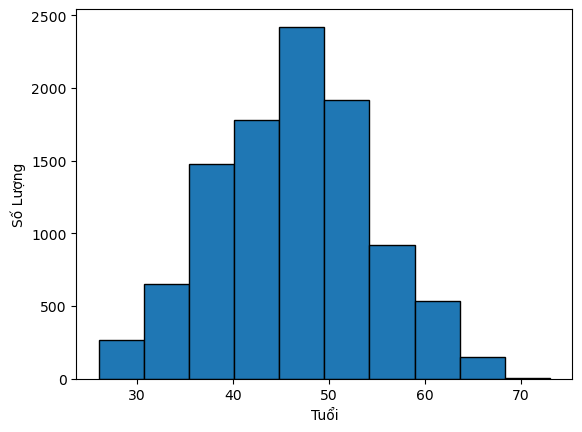

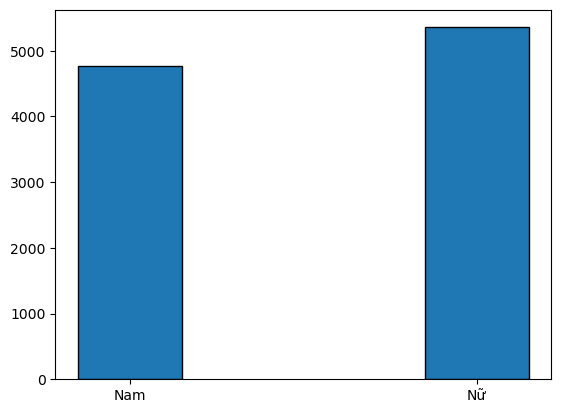

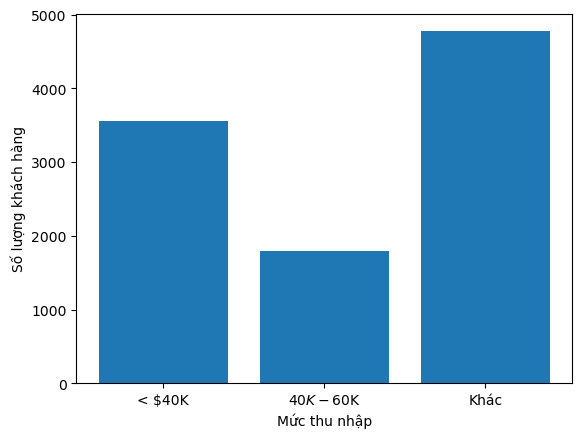

In [6]:
# Đồ thị tuổi
Plot_Age_Histogram(age)
# Đồ thị giới tính
Plot_Gender_Bar(gender)
#Đồ thị thu nhập
Plot_Income_Bar(income)


In [7]:
##SO SÁNH 2 NHÓM RỜI ĐI VÀ Ở LẠI
# DATA
status_exist, age_exist , gender_exist, dependent_exist, edu_exist, martial_exist, income_exist,\
card_exist,num_month_exist = Seperate_Attribution(exist_group)
status_attri, age_attri , gender_attri, dependent_attri, edu_attri, martial_attri, income_attri,\
card_attri,num_month_attri = Seperate_Attribution(attrited_group)


<Figure size 640x480 with 0 Axes>

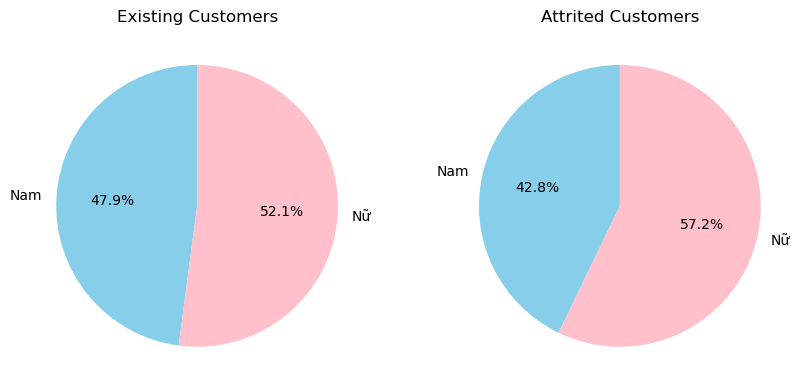

<Figure size 640x480 with 0 Axes>

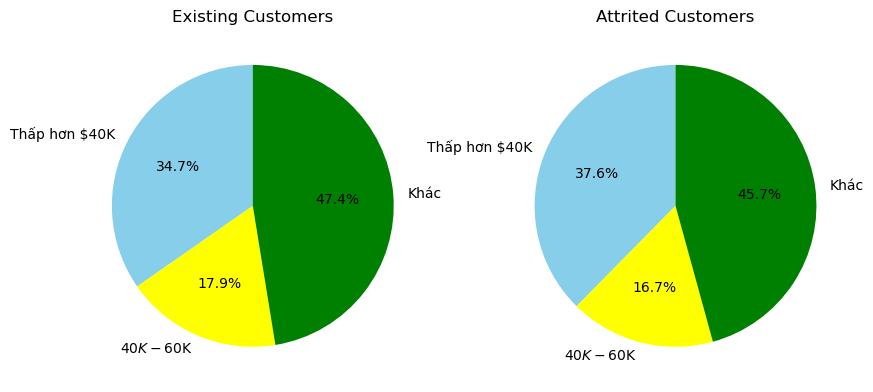

In [8]:
#Code
Compare_Gender_Each_Group(gender_exist,gender_attri)
Compare_Income_Each_Group(income_exist,income_attri)

# Quan sát :
Từ các biểu đồ ta thấy, tỉ lệ giới tính cũng như tỉ lệ thu nhập trong 2 nhóm Exist và Attrited là tương đương nhau.

Từ đó có thể kết luận :  cá nhân 2 yếu tố giới tính và thu nhập không phải là sự khác biệt rõ ràng trong việc khách hàng chọn ở lại hay rời đi


## CÂU 2 : Tính thống kê kiểm định giữa status và các yếu tố còn lại (age, gender, income,card,edu,dependent)
--> status : định tính
   + với định lượng : dùng Pearson ( Hệ số đo lường Mối quan hệ (Correlation) ) : age, dependent
   + với định tính : chi bình phương ( tần suất ) : gender, income, card, edu

In [9]:
binary_status = np.where(status=='Existing Customer',1,0)

In [10]:
print('Hệ số Point Biserial Correlation giữa trạng thái khách hàng với các đại lượng khác:')
PBC_age = Calculate_Point_biserial_Correlation(binary_status,age)
print('+ với tuổi: ',PBC_age)
PBC_dependent = Calculate_Point_biserial_Correlation(binary_status,dependent)
print('+ với số người phụ thuộc: ', PBC_dependent)
PBC_num_months = Calculate_Point_biserial_Correlation(binary_status,num_month)
print('+ với độ gắn bó: ', PBC_num_months)


Hệ số Point Biserial Correlation giữa trạng thái khách hàng với các đại lượng khác:
+ với tuổi:  -0.01820313853255065
+ với số người phụ thuộc:  -0.018990596311193687
+ với độ gắn bó:  -0.013686851177909794


# ĐÁNH GIÁ
## 1. Mối quan hệ là Rất Yếu (Negligible Relationship) <br>
Cả hai hệ số ($|r| \approx 0.018$) đều có giá trị tuyệt đối rất gần 0.<br>
Kết luận: Giữa trạng thái khách hàng (rời đi hay không) và Tuổi hay Số người phụ thuộc hay Loại thẻ hầu như không có mối quan hệ tuyến tính nào đáng kể. Nói cách khác, việc khách hàng lớn tuổi hơn hay có nhiều người phụ thuộc hơn không dự đoán được khả năng họ thay đổi trạng thái.<br>
## 2. Hướng Tương quan là Nghịch (Negative Direction)<br>
Cả hai hệ số đều mang dấu âm (negative).<br>Kết luận: Mặc dù rất yếu, nhưng mối quan hệ này có hướng nghịch. Điều này có nghĩa là:Với Tuổi: Khách hàng lớn tuổi hơn một chút (khi các yếu tố khác không đổi) có xu hướng giảm khả năng thay đổi trạng thái (ví dụ: ít có khả năng rời đi hơn, tùy thuộc vào cách mã hóa 0 và 1 của biến trạng thái).Với Số người phụ thuộc: Khách hàng có nhiều người phụ thuộc hơn một chút có xu hướng giảm khả năng thay đổi trạng thái.

In [11]:
Chi_gender = Calculate_Chi_Squared(status,gender)
Chi_income = Calculate_Chi_Squared(status,income)
Chi_card = Calculate_Chi_Squared(status,card)
Chi_edu = Calculate_Chi_Squared(status,edu)


In [12]:
print('Hệ số Chi bình phương để đo sự đồng nhất giữa trạng thái khách hàng: ')
print('+ với giới tính: ',Chi_gender)
print('+ với thu nhập: ',Chi_income)
print('+ với loại thẻ: ',Chi_card)
print('+ với học vấn: ',Chi_edu)


Hệ số Chi bình phương để đo sự đồng nhất giữa trạng thái khách hàng: 
+ với giới tính:  (14.068218798353646, 1)
+ với thu nhập:  (12.832259274756895, 5)
+ với loại thẻ:  (2.2342267000046805, 3)
+ với học vấn:  (12.51120540483051, 6)


# ĐÁNH GIÁ 
Kiểm định Chi Bình Phương cho chúng ta biết liệu tỷ lệ của trạng thái khách hàng có khác nhau đáng kể giữa các nhóm của biến phân loại đó hay không.<br>
1. Các Biến Có Tương quan với Trạng thái Khách hàng (Giá trị Chi-square Lớn)<br>
Các biến có giá trị $\chi^2$ lớn so với bậc tự do của chúng cho thấy có mối quan hệ giữa biến đó và trạng thái khách hàng.<br>Giới tính ($\chi^2 = 14.068, df = 1$): Với $df=1$, giá trị $\chi^2 > 3.84$ đã là có ý nghĩa tại $\alpha=0.05$. Giá trị $14.068$ cho thấy có sự mối quan hệ mạnh về tỷ lệ trạng thái khách hàng với hai nhóm giới tính.<br>Thu nhập và Học vấn ($\chi^2 \approx 12.5, df \approx 5-6$): Các giá trị này cũng vượt qua ngưỡng quan trọng (khoảng $\chi^2 > 11$ cho $df=5, 6$) và cho thấy có mối quan hệ giữa các nhóm này và trạng thái khách hàng.<br>
Kết luận: Giới tính, Thu nhập, và Học vấn là các yếu tố quan trọng có khả năng dự đoán trạng thái khách hàng, và nên giữ lại chúng làm đặc trưng (features) trong mô hình.
2. Biến Không Có Tương quan Đáng kể (Giá trị Chi-square Nhỏ)<br> Loại thẻ($\chi^2 = 2.234, df = 3$): Giá trị này rất nhỏ so với ngưỡng quan trọng ($\chi^2 > 7.81$ cho $df=3$ tại $\alpha=0.05$).<br>
Kết luận: Không có bằng chứng cho thấy tỷ lệ trạng thái khách hàng khác nhau đáng kể dựa trên loại thẻ. Đây có thể là một biến ít quan trọng và có thể xem xét loại bỏ nó để đơn giản hóa mô hình.